# Домашнее задание 7

In [64]:
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

Задача 1

In [65]:
x = np.array([[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])
y = np.array([ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])

def ones(x):
  ones = np.ones((x.shape[0], 1))
  return np.hstack((ones, x))

def sum_of_squares(samples):
  return ((samples - samples.mean())**2).sum()

def get_b(x):
  xtx = x.T.dot(x)
  xtx_inv = np.linalg.inv(xtx)
  return xtx_inv.dot(x.T).dot(y)

def r_square(x, b):
  z = x.dot(b)
  return 1 - ((y - z)**2).sum() / sum_of_squares(y)

x1 = ones(x[:, [0, 1]])
x2 = ones(x[:, [0, 2]])
x3 = ones(x[:, [0, 3]])
x4 = ones(x[:, [1, 2]])
x5 = ones(x[:, [1, 3]])
x6 = ones(x[:, [2, 3]])

b1 = get_b(x1)
print(b1)
model1 = LinearRegression().fit(x1, y)
print(model1.intercept_, model1.coef_)
z1 = x1.dot(b1)
R1 = r_square(x1, b1)
print(R1)

b2 = get_b(x2)
print(b2)
R2 = r_square(x2, b2)
print(R2)

b3 = get_b(x3)
print(b3)
R3 = r_square(x3, b3)
print(R3)

b4 = get_b(x4)
print(b4)
R4 = r_square(x4, b4)
print(R4)

b5 = get_b(x5)
print(b5)
R5 = r_square(x5, b5)
print(R5)

b6 = get_b(x6)
print(b6)
R6 = r_square(x6, b6)
print(R6)

max(R1, R2, R3, R4, R5, R6)

if R1 == max(R1, R2, R3, R4, R5, R6):
  print("Mодель линейной регрессии на признаках 1 и 2 дает наилучший результат")
elif R2 == max(R1, R2, R3, R4, R5, R6):
  print("Mодель линейной регрессии на признаках 1 и 3 дает наилучший результат")
elif R3 == max(R1, R2, R3, R4, R5, R6):
  print("Mодель линейной регрессии на признаках 1 и 4 дает наилучший результат")
elif R4 == max(R1, R2, R3, R4, R5, R6):
  print("Mодель линейной регрессии на признаках 2 и 3 дает наилучший результат")
elif R5 == max(R1, R2, R3, R4, R5, R6):
  print("Mодель линейной регрессии на признаках 2 и 4 дает наилучший результат")
elif R6 == max(R1, R2, R3, R4, R5, R6):
  print("Mодель линейной регрессии на признаках 3 и 4 дает наилучший результат")

n = x2.shape[0]
m = x2.shape[1] - 1
k1 = m
k2 = n - m - 1
alpha = 0.05
t = stats.f.ppf(1 - alpha, k1, k2)
F = (R2 / k1) / ((1 - R2) / k2)
if F > t:
  print("Уравнение регрессии является значимым")
else:
  print("Уравнение регрессии не является значимым")


[6.70781579 0.40786841 1.03360247]
6.7078157904977385 [0.         0.40786841 1.03360247]
0.18113594742585215
[3.62455695 1.62531203 1.21134979]
0.7634246238793151
[5.70686123 0.68359949 1.12650707]
0.4532966783144077
[2.48896193 1.60611956 0.86269915]
0.5479482734039008
[1.91685221 1.74373667 1.31971882]
0.6062055761129932
[3.64001086 0.70753914 1.04851745]
0.6224419876505322
Mодель линейной регрессии на признаках 1 и 3 дает наилучший результат
Уравнение регрессии является значимым


Задача 2

444.1773573243596 2.620538882402765
Коэффициенты линейной регрессии: [444.17735732   2.62053888]
Коэффициент детерминации: 0.7876386635293686
Критерий Фишера: 29.67164085966451
Уравнение регрессии является значимым
Параметр b является значимым
Параметр b0 является значимым
Средняя ошибка аппроксимации, %: 11.469251843561711


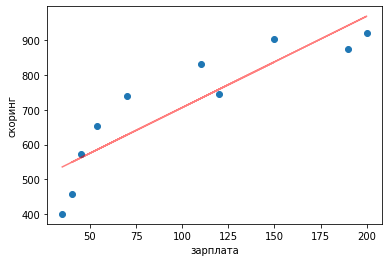

In [94]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

b = (np.mean(salary * scoring) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary ** 2) - np.mean(salary) ** 2)
b0 = np.mean(scoring) - b * np.mean(salary)
print(b0, b)

salary_ = ones(salary.reshape(-1, 1))
xtx = salary_.T.dot(salary_)
xtx_inv = np.linalg.inv(xtx)
b_ = xtx_inv.dot(salary_.T).dot(scoring)
print("Коэффициенты линейной регрессии:", b_)

ox = salary
oy = b0 + b * ox

plt.scatter(salary, scoring)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel("зарплата")
plt.ylabel("скоринг")

z = b0 + b * salary
R = 1 - ((scoring - z) ** 2).sum() / sum_of_squares(scoring)
print("Коэффициент детерминации:", R)

n_ = salary.shape[0]
m = 1
k1_ = m
k2_ = n_ - m - 1
alpha = 0.05
t_ = stats.f.ppf(1 - alpha, k1_, k2_)
F_ = (R / k1_) / ((1 - R) / k2_)
print("Критерий Фишера:", F_)

if F_ > t_:
  print("Уравнение регрессии является значимым")
else:
  print("Уравнение регрессии не является значимым")

def s_e_s(
    x: np.ndarray,
    y: np.ndarray,
    z: np.ndarray,
) -> float:
  n = x.shape[0]

  upper = ((y - z) ** 2).sum() / (n - 2)
  lower = ((x - x.mean()) ** 2).sum()
  return np.sqrt(upper / lower)

s_slope = s_e_s(salary, scoring, z)
t1 = stats.t.ppf(alpha / 2, df=n_-2)
t2 = stats.t.ppf(1 - alpha / 2, df=n_-2)
(b + t1 * s_slope, b + t2 * s_slope)
if b + t1 * s_slope > 0 and b + t2 * s_slope > 0:
  print("Параметр b является значимым")
else:
  print("Параметр b не является значимым")

def s_e_i(
    x: np.ndarray,
    y: np.ndarray,
    z: np.ndarray,
) -> float:
  return s_e_s(x, y, z) * np.sqrt((x ** 2).mean())

s_intercept = s_e_i(salary, scoring, z)
(b0 + t1 * s_intercept, b0 + t2 * s_intercept)
if b0 + t1 * s_intercept > 0 and b0 + t2 * s_intercept > 0:
  print("Параметр b0 является значимым")
else:
  print("Параметр b0 не является значимым")

E = abs((scoring - z) / scoring).sum() * 100 / n_
print("Средняя ошибка аппроксимации, %:", E)